In [1]:
import re

def extract_compare(item):
    regex = r"(.*)\((.*)\)"
    match = re.match(regex, item)
    if not match:
        raise RuntimeError(f"Operation not defined correctly {item}")
    _, parameters = match.groups()
    branches, trunk = parameters.split(";")
    return trunk, branches.split(",")

def operationSorting(arr):
    n = len(arr)
    items = [(extract_compare(e), e) for e in arr]

    i = 0
    while i<n:
        item1 = items[i]
        for j in range(i+1, n):
            item2 = items[j]
            if item1[0][0] in item2[0][1]:
                items.pop(i)
                items.insert(j, item1)
                break
        else:
            i += 1
    return list(map(lambda x: x[1], items))

{'R1': array([-1.        , -0.48025044]), 'R14': array([-0.0799054 ,  0.26802728]), 'R4': array([-0.25206258, -0.14097729]), 'R5': array([-0.45133377,  0.09120524]), 'R3': array([-0.60532736, -0.2891027 ]), 'R6': array([-0.21094592, -0.38557695]), 'R7': array([ 0.16935785, -0.23856412]), 'R8': array([-0.11383397, -0.01515283]), 'R9': array([0.24897951, 0.15054012]), 'R10': array([0.30639657, 0.495582  ]), 'R11': array([0.675483  , 0.18369639]), 'R13': array([ 0.61732456, -0.19142995]), 'R12': array([0.69586751, 0.55200326])}


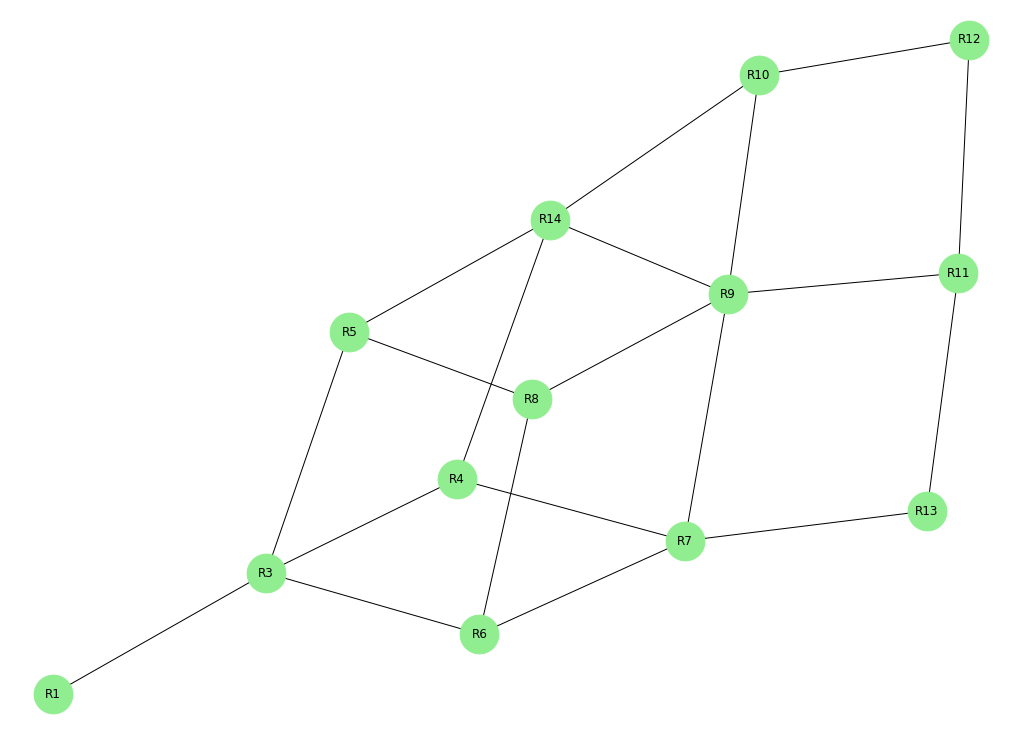

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pylab import rcParams
import pandas as pd

tree_str = "a(1;0)|b(2,4,6;1)|c(3;2)|d(5;4)|e(7;6)"

# paths = df.loc[:,'BUILDING':].stack().groupby(level=0).agg(list).values.tolist()
nodes = {'R1': set(), 'R14': {'R14', 'R5', 'R4'}, 'R3': {'R1'}, 'R4': {'R3'}, 'R5': {'R3'}, 'R6': {'R3'}, 'R7': {'R6', 'R4'}, 'R8': {'R5', 'R6'}, 'R9': {'R14', 'R7', 'R8'}, 'R10': {'R14', 'R9'}, 'R11': {'R9', 'R13'}, 'R12': {'R11', 'R10'}, 'R13': {'R7'}}
G = nx.Graph()
for s, t in nodes.items():
    if t:
        for t_n in t:
            G.add_edge(s, t_n)
    else:
        G.add_node(s)
rcParams["figure.figsize"] = 14, 10
# pos = graphviz_layout(G, prog="neato")
# pos = nx.circular_layout(G)
pos = nx.spring_layout(G, k=0.1, iterations=1000)


# for p in pos:

#     yOffSet = -300
#     xOffSet = -400

#     pos[p] = (pos[p][0]+xOffSet,pos[p][1]+yOffSet)


nx.draw(
    G, pos=pos, node_color="lightgreen", node_size=1500, with_labels=True, arrows=False, 
)

print(pos)


In [3]:
tree_str = "a(1;0)|b(2,4,6;1)|c(3;2)|d(5;4)|e(7;6)"


https://stackoverflow.com/questions/49368341/position-showing-of-labels-with-networkx-graphviz


https://stackoverflow.com/questions/20213956/plot-a-tree-like-graph-with-root-node-at-the-top


https://plotly.com/python/tree-plots/

dist_between nodes: 72

[[0.05633973174634089, 1.9555491725313763], [0.030314758709157407, 1.2911934740523747], [0.0051989131383011035, 0.6500456387298358], [-0.5916338073852943, 0.8702440239534022], [0.6174280490278089, 0.822881139454215], [-0.619169784923937, 0.18034299142716673], [0.5909111290996557, 0.13294018712764213], [-0.005649342928902768, 0.3731154483888734], [-1.0623590944782608, -0.3678465223734696], [-0.0319479925660339, -0.29822656313861473], [0.9898594100821495, -0.44823859452678927], [-0.5269774087066503, -0.8355525149636628], [0.41953135497800587, -0.8726303410600534], [-0.07426372884448923, -1.37844672289673]]


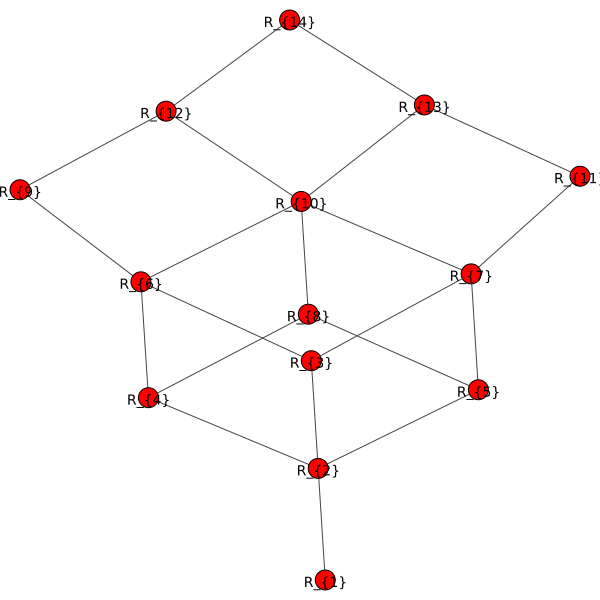

In [4]:
import igraph as ig

# import cairo
# import cairocffi

nodes = {'R_{1}': set(), 'R_{2}': {'R_{1}'}, 'R_{3}': {'R_{2}'}, 'R_{4}': {'R_{2}'}, 'R_{5}': {'R_{2}'}, 'R_{6}': {'R_{4}', 'R_{3}'}, 'R_{7}': {'R_{5}', 'R_{3}'}, 'R_{8}': {'R_{4}', 'R_{5}'}, 'R_{9}': {'R_{6}'}, 'R_{10}': {'R_{7}', 'R_{6}', 'R_{8}'}, 'R_{11}': {'R_{7}'}, 'R_{12}': {'R_{9}', 'R_{10}'}, 'R_{13}': {'R_{11}', 'R_{10}'}, 'R_{14}': {'R_{13}', 'R_{12}'}}
g = ig.Graph()
for s, t in nodes.items():
    g.add_vertex(s, label=s)
for s, t in nodes.items():
    for t_n in t:
        g.add_edge(s, t_n)

layout = g.layout(layout='auto')
# layout = g.layout_reingold_tilford(mode="in", root=[0])
print(layout.coords)
# layout = layout.scale(1)
ig.plot(g, layout=layout)
